<h1>Math</h1>

In this section we'll be introducing the next notebook of this serie, which is all about approximation methods

---

<h3>Approximation Methods notebook Introduction</h3>

Previously in this series, we've studied reinforcement learning in the tabular case

The state value $V(s)$ and the action value $Q(s,a)$, were always tables

The key requirement for this was that the states and actions were both discrete and finite

This is why Grid World is such a nice environment to hone our reinforcement learning skills

But at some point we have to ask ourselves, is this practical?

---

<h3>Are Tabular Methods Practical?</h3>

Imagine building a self-driving car

Our state may consist of lighter readings or images from the environment

These are both clearly continuous values 

In computers, image pixel values are discrete, but in reality they are based on light intensity, which is, for all practical purposes, continuous

---

Or what if we were building a robot that walks?

The state may consist of acceleration and force  measurements on various joints as well as positions and velocities

Clearly, these are also continuous values

What if we are building an agent to play chess or Go 

In this case, the states are discrete and finite, but there are way too many of them to enumerate

In all of these cases, it would seem that tabular methods are too limited

---

<h3>Function Approximation</h3>

In this notebook, we'll study the concept of function approximation

This is the idea that instead of using a table to store the value function, we use a function approximator

$$\large \hat V(s) = f(s;\theta)$$

$f : \text{ex: neural netowrk, k-nearest neighbor}$ 

$\theta : \text{model parameters}$

The models that we use come from supervised machine learning

For example, neural networks and K-nearest neighbor

---

<h3>notebook Outline</h3>

So the outline for this notebook is as follows, first, we're going to review linear regression and stochastic gradient descent

In this notebook, we'll be focused on linear models, although the concepts we will learn easily extend to neural networks and other nonlinear function approximators

Next, we'll look at feature engineering

This is a simple but very effective way of making a linear model approximate nonlinear functions

Next, we'll return to reinforcement learning and look at how function approximation can be used for prediction

As usual will well then turn our attention towards control with a focus on Q-Learning

However, note that all the methods we learn in this notebook can be applied to the previous sections of the series, such as Monte Carlo and SARSA

Finally, we will apply what we've learned to a new environment

GridWorld is nice to start with because that's what we've been using all throughout this series

But it doesn't really show us the true power of function approximation 

Because of this, we'll be looking at the Cartpole environment in OpenAI Gym

<img src='extras/58.1.PNG' width='200'></img>

Basically, our job is to build an agent that can balance a pole that sits on top of a moving car

What we will see is that the methods we have learned in this series are very general

We'll be able to apply what we've learned to this new environment, essentially without any change to the code

This is why we always repeat our famous motto

$$\large \text{All data is the same}$$

---

<h3>All data is the same</h3>

Normally, we discuss this in the context of supervised and unsupervised learning, but we'll see that this applies to reinforcement learning as well

How can the same code work for both GridWorld and Cartpole?

The key is our computer sees only numbers

It doesn't know anything about carts and poles or physics or grid worlds

It just sees numbers

This is what we mean when we say all data is the same

What we've learned is very powerful because it means that we can apply it to any problem without having to learn new concepts or write new code

<h1>Math</h1>

In this section will be briefly reviewing linear regression as part of our progression into prediction and control with function approximation

---

<h3>Linear Regression Problem Setup</h3>

So let's start with the basics of linear regression

We'll start by assuming that we have some feature vector called $X$

Imagine that we want to predict a students' exam grade

<table>
    <tr>
        <td># hours studied</td>
        <td># hours slept</td>
        <td>Exam grade</td>
    </tr>
    <tr>
        <td>8</td>
        <td>8</td>
        <td>95</td>
    </tr>
    <tr>
        <td>3</td>
        <td>12</td>
        <td>80</td>
    </tr>
    <tr>
        <td>6</td>
        <td>4</td>
        <td>65</td>
    </tr>
    <tr>
        <td>...</td>
        <td>...</td>
        <td>...</td>
    </tr>
</table>

In this case, $X$ can represent something like how many hours the student studied and how many hours they slept the night before the exam

In this case, $X$ would be a two dimensional vector

Then suppose that we want to model the exam grade as a linear function of $X$

To do this we say 

$$\large \hat y = w^Tx$$

We put a hat ($\hat {\ \ \ }$) on top of $Y$, hence $\hat Y$ because it's our prediction of the true exam grade, which we would call $Y$

Recall that $w^Tx$ is the matrix notation for an inner product 

When we convert it into scalar form, it simply means that we multiply each element of $w$ by each element of $x$ and then sum all the results together 

In general, we'll use the letter $D$ to represent the dimensionality of $x$

And note that since $w$ is being multiplied by $x$, it must have the same dimensionality as $x$

$$\large \hat y = w^Tx = \sum^D_{i=1} w_ix_i$$

---

<h3>Learning</h3>

The key question we need to ask in linear regression is, how do we find the weights, all of the $w_i$s

In order to do this, we must have a data set to train our model on

Let's continue with our example of trying to predict a student's exam grades from how many hours they studied and how many hours they slept

In order to find $w$, we would have to do something like make a survey and collect answers from students

Once many students have filled out our survey, we would put them into an Excel spreadsheet and what we would have is a table of numbers

Basically for each vector $x$ we have a corresponding $y$ 

That is for each student's inputs, for the number of hours they studied and the number of hours they slept, we also have a corresponding exam grade

The key point is we want to find $w$ such that our predictions, the $\hat y$s are close to the true $y$s

This would of course mean that we have accurate model predictions

$\large \text{Problem : find } w_i's$

$\large \text{Solution : make } \hat y \text{ close to y for each row}$

---

<h3>Loss Function / Squared Error</h3>

So the way we accomplish this is by creating a loss function

A loss function as a function that compares
the predictions to the true targets

It up puts a large number if the predictions are not close to the targets and it outputs a smaller number when the predictions are close to the targets

So clearly, what we would like to do is minimise the loss 

For regression we normally use the squared error as our loss

Basically, it ensures that all the errors are positive, but it has other convenient properties too

So let's define a loss function $J$ 

$$\large J = \sum_{n=1}^N (y_n - \hat y_n)^2$$

---

<h3>How to find w?</h3>

Now, solving for the weights $w$ given the loss $j$ is pretty easy

In fact, no other machine learning model is as easy to optimise

Let's suppose that we take our table of inputs and we assign that to be a matrix called $X$

$X$ is therefore a matrix of size $N \times D$, since there are $N$ rows and $D$ columns

Let's call the vector of targets $\overrightarrow{y}$, with an arrow on top to denote it as a vector

Clearly $\overrightarrow{y}$ is a vector of size $N \times 1$, since it has $N$ rows but only $1$ column 

<img src='extras/58.2.PNG' ></img>

Using basic vector calculus, we can minimise $J$ with respect to the weight vector $w$ doing so, we arrive at the usual solution for $w$, which is what we see here

$$\large \nabla_w J = 0 \rightarrow w = (X^TX)^{-1} X^T \overrightarrow{y}$$

---

<h3>Closed-Form Solutions</h3>

Now, in practice, modern problems do not have close form solutions

That is, we can't find $w$ using a formula

There are a few reasons for this

Number one, there are other loss functions we might use other than the squared error

The squared error is essentially the only lost function that has a nice closed form solution

Number two, we might use a model other than linear regression, such as a neural network

In this case, there won't be any closed from solution

And number three, you might be doing reinforcement learning where you'd like your agents who learn in an online fashion as in the temporal difference method

So in the general case, closed form solutions won't be used

---

<h3>Gradient Descent</h3>

The alternative, of course, is gradient descent

In fact, in order to come up with the closed form solution, we would have had to compute the gradient anyway

So it's not any more complicated mathematically than what we already know

So the basic algorithm goes like this 

For some number of iterations, we simply update the weights by taking the current value and subtracting a small number $\alpha$ times the gradient

This small number $\alpha$, is what we call the learning rate

Typically, it's a small number, like $0.1,0.01$ and so forth

The way that we would choose this learning rate is by trial and error or some variation thereof

$$\large \nabla_w J = 2X^T (Xw - \overrightarrow{y})$$

$\large Loop: \\ \qquad  \large w \leftarrow w - \alpha \nabla_w J$

<img src='extras/58.3.PNG' width='500'></img>

Note that we typically drop the two from the gradient, which comes from the square term, since we have to choose the learning rate arbitrarily anyway

So it doesn't matter if we remove any constants in front of the gradient since they are absorbed into the learning rate

---

<h3>Descent vs. Ascent</h3>

Now, one common point of confusion among beginners is the difference between gradient descent and gradient ascent

We should be able to see that if our lost function had been the negative of what it was before then we could do gradient ascent to find its maximum

$$\large w \rightarrow - \alpha \nabla_w J \\ \large w \rightarrow w + \alpha \nabla_w (-J)$$

note : so both of the above are the same

To see a simple example of this, imagine minimizing $x^2$ or maximizing $-x^2$

<img src='extras/58.4.PNG' width='400'></img>

Clearly, both of these have the same answer

The optimal value is found at $x=0$

The only difference between gradient descent and gradient descent is where we put the negative sign

But mathematically we're doing the exact same operation

Now, the reason we mention this is that in practice, we typically do gradient ascent in reinforcement learning

So don't be surprised if we see a plus sign in front of the learning rate instead of a negative
sign

---

<h3>Stochastic Gradient Descent / Ascent</h3>

The next point to mention is that in practice, we're not going to see all the data points at once

In fact, we've seen that with temporal distance learning, we update our model after each step

So the supervised learning equivalent of this would be stochastic gradient descent

It essentially minimises the same loss function on average, but it looks at one data point at a time instead of all end data points at once

So we can imagine that the pseudocode now looks like this

$Loop: \\ \qquad for \ n=1 \ldots N: \\ \qquad \qquad w \leftarrow w + \alpha(y_n - w^Tx_n)x_n$

First, we have an outer loop that goes for some number of epochs

Then we have an inner loop that goes through each of our $N$ samples

At the $n$th sample, we do gradient descent or gradient ascent on the squared error for only that one sample

Over time, this will minimise the loss

In fact, sometimes it can do so faster than if we had used the full gradient descent

For example, when we have a very large data set

OK, so that's everything we need to know about linear regression for the purpose of reinforcement learning

In the next few sections, we'll see how to apply these principles

<h1>Math</h1>

In this section, we'll be looking at a concept called feature engineering

---

<h3>Nonlinear Function Approximation</h3>

So what's our motivation for this?

Well, essentially, linear regression by itself is not a very expressive model

Linear means that the model can only be a line a plane or hyper-plane so it can approximate a curved function like this

<img src='extras/58.5.PNG' width='700'></img>

And that's a problem if the true value function is actually a nonlinear function

---

<h3>Value Function for Gridworld is Nonlinear!</h3>

In fact, we should be able to convince ourselves that even the value function for grid world is not linear

To see this, consider the policy shown here 

<img src='extras/58.6.PNG' ></img>

In the top row, the value function is always one because we go directly to the goal state

Note that this is without discounting and with a deterministic policy and environment

However, in the middle row, the value function is one on the left but minus one on the right, since the policy there is to go into the losing state 

So we can see that in the top row, the value
function is constant, but in the middle row the value function decreases from left to right

In fact, it's actually a bit more complicated than this since the value function for the terminal states is zero

So clearly this is a non-linear function

It cannot be represented by a plane over the grid

---

<h3>Why use linear regression?</h3>

Now, one question we might have is, why do we need to use linear regression in the first place?

There are plenty of other non-linear machine learning models like decision trees, support vector machines and so forth

In fact, not all models can do online updating, which is what we really need in order to do reinforcement learning

Gradient based methods that can learn using stochastic gradient descent are ideal

So linear regression and deep neural networks are the most popular approaches

---

<h3>Feature Engineering</h3>

Now, that being said, there is an easy way to get a linear regression to model non-linear functions

In fact, we've most likely encountered it before if we've ever studied machine learning or applied
machine learning in the real world

This is to do feature engineering

Often researchers and industry professionals have to apply machine learning to their domain of expertise

That might be something like drug discovery, reading MRI brain images, or trying to model automobile traffic in a city

In these scenarios, those working with machine learning often use their domain knowledge to come up with useful features after which they can apply linear regression

The key is they use their expertise in the domain to help them come up with features that are useful when using linear regression

So if we're working in drug discovery, you might apply your specialised knowledge of chemistry and
biology to help us come up with useful features

But what if we are not an expert in such a domain?

Are there any more generic methods of feature engineering?

---

<h3>Polynomial Features</h3>

One common method that most students learn when they study linear regression is the use polynomials

So imagine that we have two features

$x_1$ is how many hours a student has studied for an exam and $x_2$ is how many hours they slept the night before the exam

Instead of creating a linear regression model 

$$\large \text{Linear Model} : \hat y = w_1x_1 + w_2x_2$$ 

we create polynomial features

For example, perhaps we believe there's a quadratic relationship between $x_1$ and $x_2$ and the exam grade

In this case we could use $x_1^2$ and $x_2^2$ along with $x_1x_2$

These are called the second order terms

$$\large Quadratic Model : \hat y = w_1x_1^2 + w_2x_2^2 + w_3x_1x_2 + w_4x_1 + w_5x_2$$

We can also add a third, fourth and fifth order terms, although we generally don't go too large since these models tend to overfit

---

<h3>Feature Expansion</h3>

In general, we can think of a future expansion as a function $\varphi$ applied to the input feature $x$ 

$\varphi$ can be any function that maps any input to a real valued output vector

Using this notation are linear regression model becomes 

$$\large \hat y = w^T \varphi(x)$$

$\large \text{Example : } \varphi(x) = (\sin x_1,\cos x+2, \sin x_1 cos x_2, e^{x_1x_2}, \ldots)$


So instead of being a linear model of $x$ directly, it's now a linear model of $\varphi(x)$

And since $\varphi$ can be any function, this model can now be applied to model arbitrary non-linear functions

---

<h3>Radial Basis Function</h3>

OK, so in practice, we don't actually use polynomials that often 

We might see them in our statistics class, but in machine learning, they don't actually work that well

In this notebook, we'll study a kind of feature expansion that does tend to work well, called the radio basis function

So the intuition behind the RBF is this

Imagine that we have a space where our $x$ data points live

Now, imagine that there are some important points in this space.

We'll call them landmarks or exemplars

So suppose we have three landmarks

Let's call them $L_1$, $L_2$ and $L_3$

<img src='extras/58.7.PNG'></img>

The concept of the radial basis function is simple

To map a new input $x$ to a feature vector, we just measure how close X is to each of these landmarks

Imagine that we have some similarity measure

So if $x$ is really close to a landmark, then this similarity measure should return a number very close to $1$

If $x$ is very far away from a landmark, then the similarity measure should return a number very close to $0$

$\large \text{Similarity}(x,L_i) = 1, \text{ if }x = L_i \\ \large \text{Similarity}(x,L_i) = 0, \text{ if }x \text{ is far away from } L_1$

So for the $x$ is shown here

<img src='extras/58.8.PNG'></img>

Since it's very close to $L_1$, maybe its similarity is $0.9$.

But since it's moderately far away from $L_2$, it's similarity for that landmark is $0.3$

Since it's very far away from $L_3$, it's similarity for that landmark is $0.01$

OK, so that's the basic idea.

The feature transformation for $x$ is then a vector containing the numbers $\varphi(x)=(0.9,0.3,0.01)$

<img src='extras/58.9.PNG'></img>

---

<h3>Similarity Function</h3>

So what kind of similarity function do we use?

Well, in this notebook, the details aren't too important since we'll be using a class from scikit-learn, but if we're interested, here it is

$$\large sim(x,l_i) = \exp \left( -\beta \Vert x - l_i \Vert^2 \right)$$

<img src='extras/58.10.PNG' width='500'></img>

So basically, the function is a Gaussian 

We take the square Euclidean distance between $x$ and the landmark, weight that distance by some parameter $\beta$, negate it and then take the exponential

We should recognize this function as being shaped like a bell curve

It's equal to one if $x$ is equal to the landmark, and it approaches zero as the distance between $x$ and the landmark approaches infinity

$\beta$ controls how skinny or fat the Gaussian bell curve is

But again, unless we want to implement this oursleves in Python, the details aren't too important

As an exercise, you might actually want to try to implement this on our own

For landmarks, we can simply choose positions on the grid or samples from the environment

---

<h3>RBFSampler</h3>

So in practice, since we don't want to have to worry about how RBFs are implemented, in this notebook, we're going to use a scikit-learn class called `RBFSampler`

Basically, it's an approximation to the RBF kernel that works well in practice and is much more efficient

```python
from sklearn.kernel_approximation import RBFSampler

rbf = RBFSampler()
X_train = gather_samples() # training data, enviroment
rbf.fit(X_train)
phi_X = rbf.transform(X_val) # other data to transform
```

As is typical, `the RBFSampler` has `fit` and `transform` functions

So the way to use it is this

First we instantiate an object of type `RBFSampler`

Then we gather a bunch of samples

So if we're doing supervised learning, then this would be our training set

And if it's reinforcement learning, they might be sample states from the environment

If we call that set of samples `X`, then we call the fit function passing in `X`

Then when we encounter new samples in the future, we can transform them by calling the `transform` function

OK, so pretty simple

---

<h3>Optional Detail</h3>

One caveat to the RBF samplers is that, although it seems like it should depend on `X` when we call the fit function, it actually doesn't 

note : This means that when we call the `fit()` function, the model parameters dont actually depend on the data we passed in

For those advanced students who want to research this further, we recommend looking up the technique called "Random Kitchen Sinks"

This is outside the scope of this notebook and has nothing to do with reinforcement learning, but if we're interested, it's an interesting topic to read about

Now, of course, we may ask, well, if the RBF sampler doesn't depend on the data we pass into the `fit` function, then what's the point of collecting data and calling the fit function?

The answer is that we don't want to build a crappy program that only works for the RBF sampler

<h1>Math</h1>

So in this section, we're going to return to reinforcement learning 

---

<h3>Function Approximation for Prediction</h3>

Now that we understand the basics of function approximation, it's time to get back to our usual path of solving prediction and then control

So this section is about how to solve the prediction task using function approximation

To begin, let's assume that we have a feature expansion $\varphi$ which is applied to the state $s$ 

We'll call the output of this feature transformation $x$ 

$$\large x = \varphi(s)$$

So this is a bit different from before when we were discussing feature expansions more generically

In that case, we thought of $x$ as the input to $\varphi$

In any case, it's not that big of a deal

Just remember that $s$ is the state, and we want to transform that into a feature vector using $\varphi$ and we call that feature vector $x$

---

<h3>Function Approximation for Prediction</h3>

OK, so our model for the value function is then

$$\large \hat V_\pi(s) = w^Tx = w^T \varphi(s)$$

So what does this mean?

Well, recall that previously we thought of the value function as a table

If we wanted to look up the value function estimate for a specific state $s$ we would just go into the table and plug in $s$ to find the corresponding value

But this only works when $s$ was discrete, in which case the table makes sense

In this case now $s$ can be either discrete or continuous

When we want to find the value estimate for $s$, we first pass it through the function $\varphi$ and then dot it with the weights $w$

So this is one big difference between how we obtain values given a state $s$ 

Previously we would just look it up in a table or dictionary

Now we plug it into a function approximator

---

<h3>Squared Error</h3>

So how do we learn or in other words, improve our $V(s)$ estimates

As you recall, this can be done via stochastic gradient descent

So imagine that we've just obtained a sample return $g$ for a given state using some policy $\pi$

How do we update the value for $s$ given this new sample $G$?

Well, more correctly, we are not updating the value itself

We are updating the weights $w$ which in turn makes $\hat V$ more accurate

So how do we do this?

We recall that we use the squared error

So let's say $J$ is equal to 

$$\large J = \left(G - \hat V_\pi(s)\right)^2$$

What we would like to do is take one small step using gradient descent where the gradient is the gradient of $J$ with respect to $W$

---

<h3>Gradient</h3>

So after doing some basic calculus, we arrive at the following expression for the gradient

$$\large \nabla_w J = 2(w^Tx - G)x$$

As an exercise, we may want to derive this on our own on paper if we cant immediately see how we got this answer

And as usual, we normally drop the constant, $2$, for convenience

OK, so the gradient is equal to the prediction minus the target times the feature vector $x$

---

<h3>Update Rule</h3>

So if we apply this to our gradient descent step, here's what we get

$$\large w \leftarrow w - \alpha \left(w^Tx - G \right)x$$

And again, note that in reinforcement learning, we typically present this as gradient ascent and
use $+ \alpha$ instead

$$\large w \leftarrow w + \alpha \left(G - w^Tx \right)x$$

This is because we get the target in front of the prediction, as we had in earlier

But either way, these two expressions yield the same results

---

<h3>Pseudocode for Monte Carlo Prediction</h3>

OK, so now that we have our update, we can look at the full pseudocode from Monte Carlo prediction using function approximation

$\text{Given: }\pi \\ \text{Initialise: } w = zeros(D) \text{ # or random} \\ \text{Loop until convergance: } \\ \qquad \text{Play episode following }\pi \text{, obtain s(0),a(0),r(1),s(1),a(1),...,r(T),s(T)} \\ \qquad G = 0 \\ \qquad \text{for t in \{T-1,T-2,...,0\}:} \\ \qquad \qquad G = r(t+1) + \gamma G \\ \qquad \qquad x = \varphi(s(t)) \\ \qquad \qquad w = w + \alpha(G-w^Tx)x$

So we're given as input some policy $\pi$ whose value we want to find

We then initialie a wave vector $w$ the same size as our feature vectors, let's call that size $D$

Then we play some number of episodes 

Inside the Loop, Ww play an episode using our given policy, which gives us a sequence of states and rewards

Next, we initialize our return $G$ to zero

Then we enter a loop from timestep $T-1$ down to $0$

Inside the loop we update $G$ using the usual recursive formula

Next we find $X$ using our feature transformation function $\phi$

Then we update the weight vector $w$ using stochastic gradient descent

OK, so as we can see, this is essentially the same as the Monte Carlo pseudocode we saw before, except that we've replaced the tabular update with gradient descent on $w$

---

<h3>From Monte Carlo to Temporal Difference Learning</h3>

Now, in the coming code sections, note that we're going to skip straight ahead to temporal difference learning

We may want to try to implement the Monte Carlo version as an exercise, but for this notebook, TD learning will be the focus

Basically, the only difference between Monte Carlo and TD learning is that our target is now $r + \gamma \hat V_\pi(s^\prime)$ instead of the full return $G$

$\large \text{Monte Carlo Target}: G \\ \large \text{TD Target: } r + \gamma \hat V_\pi(s^\prime)$

One thing to be mindful of is that, when we do gradient descent, although the target depends
on $w$, we do not differentiate the target when finding the gradient of the squared error

So we treat the target as a fixed value despite the fact that it depends on $w$

So here is the pseudocode for TD Learning

$\text{Given: }\pi \\ \text{Initialise: w = zeros(D) # or random} \\ \text{Loop until convergence: } \\ \qquad \text{s = env.reset()} \\ \qquad \text{while s is not terminal:} \\ \qquad \qquad a \sim \pi(s) \\ \qquad \qquad s^\prime,r = env.move(a) \\ \qquad \qquad \text{if } s^\prime \text{ is terminal:} \\ \qquad \qquad \qquad y = r \\ \qquad \qquad \text{else:} \\ \qquad \qquad \qquad y = r + \gamma w^T \varphi(s^\prime) \\ \qquad \qquad w = w + \alpha(y-w^T \varphi(s)) \varphi(s) \\ \qquad \qquad s = s^\prime$

Again, we're given an input policy $\pi$ and we start by initializing a weight to vector $w$

Next, we enter a loop that goes for some number of episodes 

Inside the loop, we reset our environment and obtain the initial state $s$

Then we enter a second loop that exits when the episode is complete

Inside this loop, we use our policy to get our next action and then we perform this action in the environment

This gives us the reward $r$ and the next state $s^\prime$

Next we assign the target value

If $s^\prime$ is a terminal state, then the target value is just the reward $r$ since the value of terminal status is zero

Otherwise the target value is $r+\gamma V(s^\prime)$

Next we update $w$ using gradient ascent

Lastly, we assign $s^\prime$ to be $s$ for the next iteration of the loop

---

<h3>Interesting Notes</h3>

OK, so that's essentially it for prediction with function approximation

There are two final notes worth making

First, as we recall, with tabular methods when we updated $V$ or $Q$, these were only entries in a table 

Because of this, when we do an update to $V(s)$ for some state $s$, only the entry for that particular state will change

On the other hand, function approximation behaves differently

Now, when we update $w$, we can see that changing $w$ affects the value estimate for all states

---

The second thing to notice is this 

Suppose that our state space is discrete

We can see that tabular methods are really just a special case, a function approximation

Imagine that we have $D$ states, simply called $s_1,s_2,\ldots,s_D$

Now, let's suppose that we do a very simple feature transformation called one hot encoding

$$\varphi(s_1) = (1,0,0,\ldots) \\ \varphi(s_2) = (0,1,0,\ldots) \\ \ldots \\ \varphi(s_D) = (0,\ldots,0,1) $$

---

<h3>Tabular Methods are a Special Case of Linear Approximation</h3>

Now, what is our model? 

We have we have 

$$\large \hat V_\pi(s) = w^T \varphi(s)$$

But since $\varphi(s)$ is just a one hot encoding, what does this give us?

$\large \hat V_\pi(s_1) = (w_1,w_2,\cdots,w_D) \cdot (1,0,0,\cdots) = w_1$

$\large \hat V_\pi(s_2) = (w_1,w_2,\cdots,w_D) \cdot (0,1,0,\cdots) = w_2$

So as we can see, in this case, we just have a single parameter for estimating the value for each state, which is exactly the same as the tabular method

Updating $w_1$ will update $V(s_1)$, but this will have no effect on any of the other values

In fact, $w_1 = V(s_1)$

---

Furthermore, notice that the update rule reduces to what we have in the tabular case, since the gradient is just $1$ for the state of interest in $0$ for all other states

note : gradient is just something like (0,0,1,0,0,...)

$\large \text{Update Rule : } w_i \leftarrow w_i + \alpha(G-w_i) \cdot 1$

To see this, we can first note that the update rule shown here is correct

The gradient is one for the particular state of interest

But recall that, as we just showed, $w_i$ is the same thing as $V(s_i)$

note : $w_i = V(s_i)$

In other words, these weights are actually just the value function estimate for each state

Therefore, this update rule, which we derive by gradient descent, is actually the same as the update rule we already learned earlier for tabular methods

That's why earlier in this series, we mentioned that the update rule for $V(s)$ that looks like gradient descent actually is gradient descent

---

<h3>Why is is useful?</h3>

So this is actually pretty useful

Imagine that we're writing code and we can't get it to work

One way to debug our code is to use one hot encoding, which is equivalent to the tabular method

Then we can check whether our answer is the same as what you get if we implement the tabular method directly

If they are the same, then we can be more confident that our code is correct

<h1>code</h1>

In [11]:
# go go lets go !
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_approximation import RBFSampler

In [12]:
# first, we will be using the standard Gridworld

# first lets implement our Gridworld enviroment
# we will be using the same interface as described above

class GridWorld:
    def __init__(self,rows,cols,start_pos):
        self.rows = rows
        self.cols = cols
        self.pos = start_pos
        self.start_pos = start_pos
    
    def current_state(self):
        return self.pos
    
    def set_state(self,state):
        self.pos = state
        
    def set_actions_rewards(self,actions,rewards):
        self.actions = actions
        self.rewards = rewards
        
    def all_states(self,):
        return [(i,j) for i in range(self.rows) for j in range(self.cols)]
    
    def is_terminal(self,state):
        # we cant perform an action in a terminal state
        # so we expect not to find it in the keys
        return state not in self.actions.keys()
    
    def game_over(self):
        return self.is_terminal(self.pos)
    
    def next_state(self,s,a):
        # return next state should we take action a
        # but do not take that action
        i,j = s
        # if we are allowed to do this action in our current position
        if a in self.actions.get(s,[]): 
            if a == 'R':
                j += 1
            if a == 'L':
                j -= 1
            if a == 'U':
                i -= 1
            if a == 'D':
                i += 1
        return (i,j)
    
    def move(self,a):
        # return next state should we take action a
        # this time we actually make the move
        # and thus return reward
        i,j = self.pos
        # if we are allowed to do this action in our current position
        if a in self.actions.get(self.pos,[]): 
            if a == 'R':
                j += 1
            if a == 'L':
                j -= 1
            if a == 'U':
                i -= 1
            if a == 'D':
                i += 1
        self.pos = (i,j)
        # if no reward return 0
        return self.rewards.get(self.pos,0)
    
    # lets add methods to print values and actions
    def print_values(self,V):
        for i in range(self.rows):
            print('-'*9*self.rows)
            for j in range(self.cols):
                v = V[i,j]
                if v >= 0:
                    # if 0 or +ve, add space so it aligns well when we have -
                    print(" %.2f|" %v,end="")
                else:
                    print("%.2f|" %v,end="")
            print("")
    
    def print_policy(self,P):
        for i in range(self.rows):
            print('-'*6*self.rows)
            for j in range(self.cols):
                print(" %s |" %P.get((i,j),' '),end="")
            print("")
                
    def state_to_loc(self,state): # convert state tupe (0,1) to location 1
        return state[0]*self.rows + state[1]
    
    def reset(self):
        self.pos = self.start_pos


def standrad_grid():
    g = GridWorld(3,4,(2,0))
    rewards = {(0,3):1,(1,3):-1}
    actions = {
        (0,0): ('D','R'),
        (0,1): ('L','R'),
        (0,2): ('L','D','R'),
        (1,0): ('U','D'),
        (1,2): ('U','D','R'),
        (2,0): ('U','R'),
        (2,1): ('L','R'),
        (2,2): ('L','R','U'),
        (2,3): ('L','U')
    }
    g.set_actions_rewards(actions,rewards)
    return g

In [13]:
g = standrad_grid()

In [14]:
# policy to evaluate
policy = {
    (2,0) : 'U',
    (1,0) : 'U',
    (0,0) : 'R',
    (0,1) : 'R',
    (0,2) : 'R',
    (1,2) : 'R',
    (2,1) : 'R',
    (2,2) : 'R',
    (2,3) : 'U',
}

In [15]:
g.print_policy(policy)

------------------
 R | R | R |   |
------------------
 U |   | R |   |
------------------
 U | R | R | U |


In [26]:
class Approx:
    def gather_samples(self,g,num_episodes=10000):
        samples = []
        all_actions = ['L','R','U','D']
        
        for epsiodes in range(num_episodes):
            g.reset()
            s = g.current_state()
            samples.append(s)
            while not g.game_over():
                a = np.random.choice(['L','R','U','D'])
                _ = g.move(a)
                s = g.current_state()
                samples.append(s)
        return samples
    
    def build_phi(self,g,num_episodes=10000,D=100):
        # first we gather sum samples
        samples = self.gather_samples(g,num_episodes)
        # next we can build our RBF Sampler
        rbf = RBFSampler(n_components = D)
        rbf.fit(samples)
        self.rbf = rbf
        self.D = D
                
        # we can also initialise the weights here
        # since we know now D
        self.W = np.zeros(D)
        
    def epsilon_greedy(self,best_action,eps=0.1):
        if np.random.random() < eps:
            return np.random.choice(['L','R','U','D'])
        else:
            return best_action
        
    def phi(self,s):
        return self.rbf.transform([s]).squeeze()
                
    def train(self,g,policy,episodes=20000,gamma=0.9,alpha=0.1):
        all_states = g.all_states()
        all_actions = ['L','R','U','D']
        # lets keep track of mse
        mse = np.zeros(episodes)
        # random policy
        if policy is None:
            policy = {s:np.random.choice(all_actions) for s in all_states if not g.is_terminal(s)}
        
        # we already initialised W
        # so that if we train more we can begin from where we left off
        for episode in range(episodes):
            g.reset()
            s = g.current_state()
            n_steps = 0
            while not g.game_over():
                a = self.epsilon_greedy(policy[s])
                r = g.move(a)
                s_prime = g.current_state()
                
                if g.is_terminal(s_prime):
                    y = r
                else:
                    y = r + gamma * (self.W @ self.phi(s_prime))
                self.W = self.W + alpha*(y-self.W@self.phi(s))*self.phi(s) 
                s = s_prime
                # calculate mse
                mse[episode] += (y-self.W@self.phi(s))**2
                n_steps += 1
            mse[episode] /= n_steps
        plt.title('mse per epoch')
        plt.plot(mse)
        plt.show()
                
    def get_value(self,g):
        V = np.zeros((g.rows,g.cols))
        for i in range(g.rows):
            for j in range(g.cols):
                s = (i,j)
                if not g.is_terminal(s):
                    V[i,j] = self.W @ self.phi((i,j))
        return V        

In [31]:
model = Approx()
model.build_phi(g)

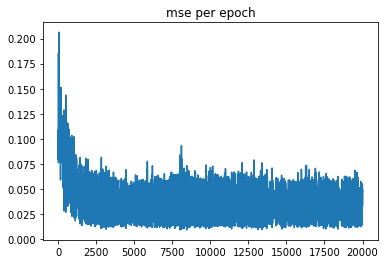

In [32]:
model.train(g,policy)

Now, we might notice something strange, which is that, although we have a general decrease at the start, the error fluctuates instead of converging to zero

Of course, this is because we are using Epsilon Greedy, which sometimes brings us to different states which have different values than what is dictated by the greedy policy

But if we only acted according to the greedy policy, then we wouldn't be able to learn the values of some of those states

In [33]:
V = model.get_value(g)

In [34]:
g.print_values(V)
g.print_policy(policy)

---------------------------
 0.75| 0.84| 0.95| 0.00|
---------------------------
 0.67| 0.00|-0.91| 0.00|
---------------------------
 0.59|-0.71|-0.86|-0.99|
------------------
 R | R | R |   |
------------------
 U |   | R |   |
------------------
 U | R | R | U |


If we look at the learned value function, we can see that the values are pretty close to what we would expect

They are large going into the gold state and they decrease the further away you get

They are larger negative going toward the losing state

And they also decrease the further away we get

So the results make sense, even though the mean squared error does not converge to zero

<h1>Math</h1>

In this section, we're going to continue our discussion about how to apply approximation methods in reinforcement learning

---

<h3>Function Approximation for Control</h3>

So we just learned how to use function approximation for approximating the state value $V(s)$ 

The next task for us is to consider how we will approximate the action value of $Q(s,a)$

Previously, our method was to apply some feature expansion $\varphi$ to the state $s$

This would give us a new feature vector $x$

$$\large x = \varphi(s)$$

Then we could take $x$, dot with the weight vector $w$ and get an approximation for $V(s)$

$$\large \hat V(s) = w^Tx$$

But now things are a bit more complicated because of the action 

In this case, we're going to simply have a new feature expansion $\varphi$ that transforms both the state and the action

$$\large x = \varphi(s,a)$$

Once we have that, we can again just dot it with the weight vector $W$ to get our approximation of $Q(s,a)$

$$\large \hat Q(s,a) = w^Tx$$

---

<h3>How to transform both state and action?</h3>

So let's consider how $\varphi$ can act on both the state and action 

In Gridworld, our actions are categorical up, down, left and right 

In machine learning, one simple way to encode categorical variables is to use what is called one hot encoding

So since we have four actions, our actions will be encoded as four dimensional vectors 

So our actions might be:

$ \text{Up} = (1,0,0,0) \\  \text{Down} = (0,1,0,0) \\  \text{Left} = (0,0,1,0) \\ \text{Right} = (0,0,0,1)$

OK, so pretty simple.

Then we can make a new vector by simply concatenating the state vector and the action's

So if our Gridworld position is $(2,3)$ and our action is $\text{Up}$

Then the total concatenated vector would be $(2,3,1,0,0,0)$

$s = (2,3), a = \text{Up} \\ (s,a) = (2,3,1,0,0,0)$

And now we just have a simple vector so we can apply a feature expansion such as the $\text{RBF}$ kernel as usual

$\varphi(s,a) = \varphi((2,3,1,0,0,0))$

---

<h3>Update Rule</h3>

Once we've done that, the process of updating the wait vector $W$ is just as simple as it was for the state value

Again, we have some target $G$ and we want to minimize the squared error using stochastic gradient descent

So for a single sample, our loss will be 

$$\large J = (G-\hat Q(s,a))^2$$

Then our gradient with respect to $W$ is 

$$\large \nabla_w J = -2(G-w^Tx)x$$

And at this point our gradient update rule is the same as usual

In fact, no different from before

$$\large w \leftarrow w + \alpha(G-w^Tx)x$$

---

<h3>Types of Targetes</h3>

Again, function approximation for control applies to all the methods we've learned previously in the series

So our target cepends on the method we are doing

$$\large \begin{array}{c|c} \text{Method} & \text{Target} \\ \hline \text{Monte Carlo Target} & G = r+ \gamma r^\prime + \gamma^2 r'' + \ldots \\ \text{SARSA Target} & G = r + \gamma Q(s',a') \\ \text{Q-Learning Target} & G = r + \gamma \max\limits_{a^\prime} Q(s',a') \end{array}$$


OK, so hopefully we can agree that this is pretty simple

In this notebook we'll be focusing on Q-Learning, but as an exercise we'll be assigned to implement the other methods as well :)

---

<h3>Q-Learning with Function Approximation Pseudocode</h3>

So although we can probably do this ourselves by now, let's look at the pseudocode for completeness

$\text{Initialise: w = zeros(D) # or random} \\ \text{Loop until convergance:} \\ \qquad \text{s = env.reset()} \\ \qquad \text{while s in not teminal:} \qquad \qquad \text{a ~ epsilon_greedy(Q,s) consider how we'd implement this} \\ \qquad \qquad s',r = env.move(a) \\ \qquad \qquad \text{if s' is terminal:} \\ \qquad \qquad \qquad y = r \\ \qquad \qquad \text{else} \\ \qquad \qquad \qquad y = r + \gamma \max\limits_{a'} \{w^T \varphi(s',a')\}  \\ \qquad \qquad w = w + \alpha(y-w^T \varphi(s,a)) \varphi(s,a) \\ \qquad \qquad s = s'$

To start, we initialise a random weight vector $w$, which is the same size as the concatenated vector of $s$ and $a$ together

This also effectively initialises our policy which is derived from $Q$

Next, we do a loop over some number of episodes

Inside the loop, we reset the environment and obtain the initial state

Next, we enter an inner loop over each step of the episode

Inside this loop, we use Epsilon greedy to determine the next action to take

Then we perform this action in the environment

This gives us back the next state $s'$ and the reward $r$

Next, we assign the target value, if $s'$ is a terminal state, then the target is just the reward $r$,  otherwise it's $y = r + \gamma \max\limits_{a'} \{w^T \varphi(s',a')\}$

Next, we update $w$ using our gradient ascent formula

Finally, we assign $s'$ to be $s$ for the next iteration of the loop

OK, so that's it for Q-Learning with function approximation

<h1>code</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_approximation import RBFSampler

In [2]:
class GridWorld:
    def __init__(self,rows,cols,start_pos):
        self.rows = rows
        self.cols = cols
        self.pos = start_pos
        self.start_pos = start_pos
    
    def current_state(self):
        return self.pos
    
    def set_state(self,state):
        self.pos = state
        
    def set_actions_rewards(self,actions,rewards):
        self.actions = actions
        self.rewards = rewards
        
    def all_states(self,):
        return [(i,j) for i in range(self.rows) for j in range(self.cols)]
    
    def is_terminal(self,state):
        # we cant perform an action in a terminal state
        # so we expect not to find it in the keys
        return state not in self.actions.keys()
    
    def game_over(self):
        return self.is_terminal(self.pos)
    
    def next_state(self,s,a):
        # return next state should we take action a
        # but do not take that action
        i,j = s
        # if we are allowed to do this action in our current position
        if a in self.actions.get(s,[]): 
            if a == 'R':
                j += 1
            if a == 'L':
                j -= 1
            if a == 'U':
                i -= 1
            if a == 'D':
                i += 1
        return (i,j)
    
    def move(self,a):
        # return next state should we take action a
        # this time we actually make the move
        # and thus return reward
        i,j = self.pos
        # if we are allowed to do this action in our current position
        if a in self.actions.get(self.pos,[]): 
            if a == 'R':
                j += 1
            if a == 'L':
                j -= 1
            if a == 'U':
                i -= 1
            if a == 'D':
                i += 1
        self.pos = (i,j)
        # if no reward return 0
        return self.rewards.get(self.pos,0)
    
    # lets add methods to print values and actions
    def print_values(self,V):
        for i in range(self.rows):
            print('-'*9*self.rows)
            for j in range(self.cols):
                v = V[i,j]
                if v >= 0:
                    # if 0 or +ve, add space so it aligns well when we have -
                    print(" %.2f|" %v,end="")
                else:
                    print("%.2f|" %v,end="")
            print("")
    
    def print_policy(self,P):
        for i in range(self.rows):
            print('-'*6*self.rows)
            for j in range(self.cols):
                print(" %s |" %P.get((i,j),' '),end="")
            print("")
                
    def state_to_loc(self,state): # convert state tupe (0,1) to location 1
        return state[0]*self.rows + state[1]
    
    def reset(self):
        self.pos = self.start_pos

In [3]:
def standrad_grid():
    g = GridWorld(3,4,(2,0))
    rewards = {(0,3):1,(1,3):-1}
    actions = {
        (0,0): ('D','R'),
        (0,1): ('L','R'),
        (0,2): ('L','D','R'),
        (1,0): ('U','D'),
        (1,2): ('U','D','R'),
        (2,0): ('U','R'),
        (2,1): ('L','R'),
        (2,2): ('L','R','U'),
        (2,3): ('L','U')
    }
    g.set_actions_rewards(actions,rewards)
    return g

In [4]:
class Approx_control:
    def gather_samples(self,g,num_episodes=10000):
        samples = []
        all_actions = ['L','R','U','D']
        a_one_hot = np.zeros(len(all_actions),dtype='int32')
        for epsiodes in range(num_episodes):
            g.reset()
            s = g.current_state()
            while not g.game_over():
                i = np.random.choice(len(all_actions))
                a = all_actions[i]
                _ = g.move(a)
                # one hot encode a
                a_one_hot[:] = 0
                a_one_hot[i] = 1
                samples.append(s+tuple(a_one_hot))
                s = g.current_state()

        return samples
    
    def build_phi(self,g,num_episodes=10000,D=100):
        # first we gather sum samples
        samples = self.gather_samples(g,num_episodes)
        # next we can build our RBF Sampler
        rbf = RBFSampler(n_components = D)
        rbf.fit(samples)
        self.rbf = rbf
        self.D = D
                
        # we can also initialise the weights here
        # since we know now D
        self.W = np.zeros(D)
        
    def epsilon_greedy(self,best_action,eps=0.1):
        if np.random.random() < eps:
            return np.random.choice(['L','R','U','D'])
        else:
            return best_action
        
    def phi(self,s):
        if type(s) == tuple:
            s = [s]
        return self.rbf.transform(s).squeeze()
    
    def max_Q(self,s,get=None):
        all_actions = ['L','R','U','D']
        # we need to calculate Q(s,a) for each action a and given state s
        # the best action is the argmax
        actions_one_hot = np.diag(np.ones(len(all_actions)))
        s = np.repeat([s],len(all_actions),axis=0)
        s_a = np.hstack((s,actions_one_hot))
        
        Q = self.phi(s_a) @ self.W
        
        best_action = all_actions[np.argmax(Q)] # the argmax returns the index not the action itself
        max_Q = np.max(Q)
        
        if get == 'value':
            return max_Q
        if get == 'action':
            return best_action
        
        return max_Q,best_action
        
                
    def train(self,g,episodes=20000,gamma=0.9,alpha=0.1):
        all_states = g.all_states()
        all_actions = ['L','R','U','D']
        # lets keep track of mse
        mse = np.zeros(episodes)
        # lets also do the same for the rewards
        rewards = np.zeros(episodes)
        
        # create array to store one hot encoded actions
        a_one_hot = np.zeros(len(all_actions)).astype('int')
        # we already initialised W
        # so that if we train more we can begin from where we left off
        for episode in range(episodes):
            if (episode+1)%1000 == 0:
                print('Episode: ',episode+1,'/',episodes)
            g.reset()
            s = g.current_state()
            n_steps = 0
            while not g.game_over():
                a = self.epsilon_greedy(self.max_Q(s,get='action'))
                r = g.move(a)
                rewards[episode] += r
                s_prime = g.current_state()
                
                # one hot encode a
                a_one_hot[:] = 0
                a_one_hot[all_actions.index(a)] = 1
                s_a = s + tuple(a_one_hot)
                
                if g.is_terminal(s_prime):
                    y = r
                else:
                    y = r + gamma * self.max_Q(s_prime,get='value')
                delta = y-self.W@self.phi(s_a)     
                self.W = self.W + alpha*delta*self.phi(s_a) 
                s = s_prime
                # calculate mse
                mse[episode] += delta**2
                n_steps += 1
            mse[episode] /= n_steps
            
        plt.title('mse per episode')
        plt.plot(mse)
        plt.show()

        plt.title('total rewards per episode')
        plt.plot(rewards)
        plt.show()
                
    def get_value_policy(self,g):
        all_actions = ['L','R','U','D']
        V = np.zeros((g.rows,g.cols))
        pi = {}

        for i in range(g.rows):
            for j in range(g.cols):
                s = (i,j)
                # use max_Q to get V(s) and a*
                if not g.is_terminal(s):
                    v,a = self.max_Q(s)
                    V[i,j] = v
                    pi[i,j] = a
        return V,pi


In [5]:
g = standrad_grid()

Episode:  1000 / 20000
Episode:  2000 / 20000
Episode:  3000 / 20000
Episode:  4000 / 20000
Episode:  5000 / 20000
Episode:  6000 / 20000
Episode:  7000 / 20000
Episode:  8000 / 20000
Episode:  9000 / 20000
Episode:  10000 / 20000
Episode:  11000 / 20000
Episode:  12000 / 20000
Episode:  13000 / 20000
Episode:  14000 / 20000
Episode:  15000 / 20000
Episode:  16000 / 20000
Episode:  17000 / 20000
Episode:  18000 / 20000
Episode:  19000 / 20000
Episode:  20000 / 20000


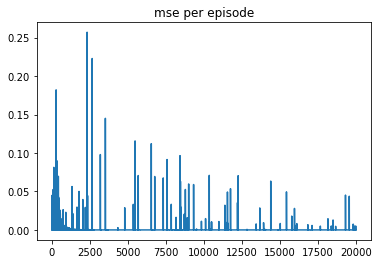

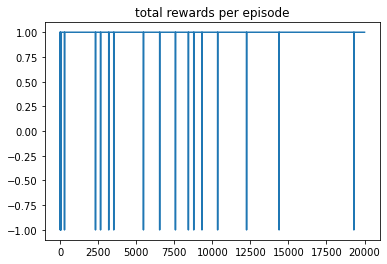

In [6]:
model = Approx_control()
model.build_phi(g)
model.train(g)

In [7]:
V,pi = model.get_value_policy(g)
g.print_values(V)
g.print_policy(pi)

---------------------------
 0.81| 0.90| 1.00| 0.00|
---------------------------
 0.73| 0.00| 0.91| 0.00|
---------------------------
 0.66| 0.61| 0.69| 0.19|
------------------
 R | R | R |   |
------------------
 U |   | U |   |
------------------
 U | L | U | L |


In [8]:
# lets try again with the negative grid
# to see if our model learns to take the shortest path

def negative_grid(step_cost=-0.1):
    # in this game we want to try to minimize the number of moves
    # so we will penalize every move
    g = standrad_grid()
    g.rewards.update({
        (0, 0): step_cost,
        (0, 1): step_cost,
        (0, 2): step_cost,
        (1, 0): step_cost,
        (1, 2): step_cost,
        (2, 0): step_cost,
        (2, 1): step_cost,
        (2, 2): step_cost,
        (2, 3): step_cost,
    })
    return g

In [9]:
g = negative_grid()

Episode:  1000 / 20000
Episode:  2000 / 20000
Episode:  3000 / 20000
Episode:  4000 / 20000
Episode:  5000 / 20000
Episode:  6000 / 20000
Episode:  7000 / 20000
Episode:  8000 / 20000
Episode:  9000 / 20000
Episode:  10000 / 20000
Episode:  11000 / 20000
Episode:  12000 / 20000
Episode:  13000 / 20000
Episode:  14000 / 20000
Episode:  15000 / 20000
Episode:  16000 / 20000
Episode:  17000 / 20000
Episode:  18000 / 20000
Episode:  19000 / 20000
Episode:  20000 / 20000


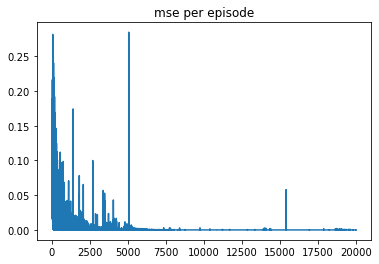

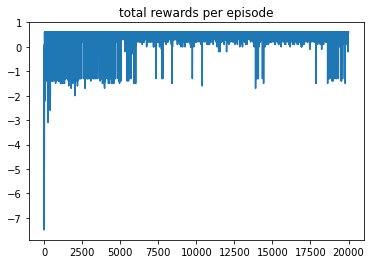

In [10]:
model = Approx_control()
model.build_phi(g)
model.train(g)

In [12]:
V,pi = model.get_value_policy(g)
g.print_values(V)
g.print_policy(pi)

---------------------------
 0.62| 0.80| 1.00| 0.00|
---------------------------
 0.46| 0.00| 0.80| 0.00|
---------------------------
 0.31| 0.46| 0.62| 0.44|
------------------
 R | R | R |   |
------------------
 U |   | U |   |
------------------
 R | R | U | L |


In [30]:
# so we get the expected result
# note that the policy for the state at the bottom right might not be sensible in other runs
# this is due to the fact that it doesnot get visisted very often during the training process

<h1>Math</h1>

In this section, we'll be looking at Q-Learning with function approximation again, but for a new environment

---

<h3>CartPole and OpenAI Gym</h3>

This section will look at the CartPole environment, which is part of OpenAI Gym

So before we look at the code, we're going to discuss some preliminary basics like what is gym, what is CartPole and so forth

So first, if we've never heard of OpenAI Gym before, it's a Python library that contains many reinforcement learning environments from CartPole to Atari games

Although if we want Atari games, we'll have to install some extra add ons

Getting gym is very easy if we don't have it yet

Simply use `pip install gym # like any other package`, as we normally would for any other Python library

---

<h3>What is CartPole?</h3>

OK, so once we have gym, we have access to CartPole, but what is CartPole?

CartPole is an environment where our job is to balance a pole that sits on top of a car

<img src='extras/58.11.PNG' width='250'></img>

We can imagine that this would be challenging for humans since the pole will just fall down

Note that the pole rotates around a pivot point where it is attached to the cart

Now the cart itself sits on a track, so it's limited to moving only left or right

In fact, this setup is a classic problem in control theory and reinforcement learning

If we ever have an opportunity to take a course and control theory, we'll get to work with CartPole in the real world

That is a physical pool attached to a physical car that sits on a physical track

<img src='extras/58.12.PNG' width='250'>

Our state vector consists of sensor readings and our actions are real instructions to make a motor
spin one way or the other

---

<h3>OpenAI Gym's CartPole</h3>

So in this virtual version of CartPole, what are the state's actions and rewards?

Well, we're encouraged to read the documentation for CartPole (see <a href='https://github.com/openai/gym/wiki/CartPole-v0'>here</a>), but here are the basics.

The state is a four vector consisting of the carte's position and velocity and the pole's angle and angular velocity

<img src='extras/58.13.PNG' width='350'>

The actions are to either push the cart left or right

<img src='extras/58.14.PNG' width='250'>

The reward is $+1$ for every timestep that the pole and cart stay within a certain range

<img src='extras/58.15.PNG' width='600'>

When our pole falls down past a certain angle or the cart goes past a certain position, the episode will terminate and we'll stop receiving rewards

<img src='extras/58.16.PNG' width='600'>

Note that in previous iterations of gym, it was possible for this environment to go on indefinitely

However, for newer versions, the episode automatically ends after we reach $200$ steps

Therefore, the maximum reward we can achieve for episode is $200$

There are ways to hack around the code to make it last forever, but we won't consider how to do that

So essentially the thing we should notice about CartPole is that the state variables are now continuous values

This makes it the perfect candidate for function approximation

---

<h3>Using Gym in Python</h3>

The next thing we're going to do is look at how to use Gym in Python code

```python
# instantiate enviroment
env = gym.make("CartPole-v0")

s = env.reset()
done = False
while not done:
    a = env.action_space.sample() # np.random.choice(2)
    s_next, r, done, info = env.step(a)
    env.render() # optional: displays enviroment
```

We'll see that it's very similar to what we've done in this series, so the changes we need to make are minimal

And this example will assume that our policy is just to perform actions according to a uniform, random distribution

So to start, we instantiate a new environment by calling `gym.make` passing in the name of the environment

Again, note that we can get these names from the documentation

Next, we call `env.reset()`, which puts our agent back into the initial state, and this function
also returns that state

So this is the same as the code in this series

Next, we set a boolean variable called `done` to `False`, we'll be updating this variable as we go along and this will become `True` when we reach a terminal state

Next, we enter a loop that exits when `done` becomes `True` 

Inside the loop, we call in `env.action_space.sample()` in order to select a random action

Note that this is just one way of selecting an action 

In gym, discrete actions are encoded as integers

So an alternative would have been to use `numpy` to select a random number from a set containing $0$ and $1$, `np.random.choice(2)`

Next, we call the function in `env.step()` passing in the action `a` 

Note that this is similar to our `grid.move()` function

The `step` function returns for items, the next state, the reward, the done flag and an info dictionary

Typically, this info dictionary is empty so it can be ignored

One optional step is to call the `env.render` function

This will open a new window and show us visually the CartPole environment 

So we can actually see the CartPole system move around on the track and how well our agent controls it

This also applies to video games

So if we have a video game environment, we can call `env.render()` and it will show us the frames of a video game

However, keep in mind that rendering video on our screen is slow, so we may not want to do this all the time, especially when our agent is training

Note that at this point, the `done` flag is updated, so when this becomes `true`, our episode is terminated

OK, so that's the interface for OpenAI Gym environments

Hopefully we agree that it's nothing too unexpected

<h1>Math</h1>

In [1]:
# now again for cartpole
# basically the same code but few modifications for the cartpole enviroment
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_approximation import RBFSampler
# now we import gym
import gym

In [2]:
class Approx_control:
    def gather_samples(self,env,num_episodes=10000):
        samples = []
        action_space = env.action_space.n # number of possible acions
        a_one_hot = np.zeros(action_space,dtype='int32')
        for epsiodes in range(num_episodes):
            s = env.reset()
            done = False
            while not done:
                a = env.action_space.sample() # returns action, an integer
                s_prime,r,done,info = env.step(a)
                # one hot encode a
                a_one_hot[:] = 0
                a_one_hot[a] = 1
                samples.append(np.concatenate((s,a_one_hot)))
                s = s_prime

        return samples
    
    def build_phi(self,g,num_episodes=10000,D=100):
        # first we gather sum samples
        samples = self.gather_samples(g,num_episodes)
        # next we can build our RBF Sampler
        rbf = RBFSampler(n_components = D)
        rbf.fit(samples)
        self.rbf = rbf
        self.D = D
                
        # we can also initialise the weights here
        # since we know now D
        self.W = np.zeros(D)
        
    def epsilon_greedy(self,env,best_action,eps=0.1):
        if np.random.random() < eps:
            return env.action_space.sample()
        else:
            return best_action
        
    def phi(self,s):
        if len(s.shape) == 1:
            s = [s]
        return self.rbf.transform(s).squeeze()
    
    def max_Q(self,s,get=None):
        # we need to calculate Q(s,a) for each action a and given state s
        # the best action is the argmax
        action_space = env.action_space.n # number of possible acions
        actions_one_hot = np.diag(np.ones(action_space))
        s = np.repeat([s],action_space,axis=0)
        s_a = np.hstack((s,actions_one_hot))
        
        Q = self.phi(s_a) @ self.W
        
        best_action = np.argmax(Q) # actions are already integers, so argmax returns action itself
        max_Q = np.max(Q)
        
        if get == 'value':
            return max_Q
        if get == 'action':
            return best_action
        
        return max_Q,best_action
        
                
    def train(self,env,episodes=2000,gamma=0.9,alpha=0.1):
        action_space = env.action_space.n
        # lets keep track of mse
        mse = np.zeros(episodes)
        # lets also do the same for the rewards
        rewards = np.zeros(episodes)
        
        # create array to store one hot encoded actions
        a_one_hot = np.zeros(action_space).astype('int')
        # we already initialised W
        # so that if we train more we can begin from where we left off
        done = False
        for episode in range(episodes):
            if (episode+1)%50 == 0:
                print('Episode: ',episode+1,'/',episodes)
            s = env.reset()
            done = False
            n_steps = 0
            while not done:
                a = self.epsilon_greedy(env,self.max_Q(s,get='action'))
                s_prime,r,done,info = env.step(a)
                rewards[episode] += r
                
                # one hot encode a
                a_one_hot[:] = 0
                a_one_hot[a] = 1
                s_a = np.concatenate((s,a_one_hot))
                
                if done: # so s_prime is a terminal state
                    y = r
                else:
                    y = r + gamma * self.max_Q(s_prime,get='value')
                delta = y-self.W@self.phi(s_a)     
                self.W = self.W + alpha*delta*self.phi(s_a) 
                s = s_prime
                # calculate mse
                mse[episode] += delta**2
                n_steps += 1
            mse[episode] /= n_steps

            
        plt.title('mse per episode')
        plt.plot(mse)
        plt.show()

        plt.title('total rewards per episode')
        plt.plot(rewards)
        plt.show()
        
    def play_game(self,env,eps=0,episodes=1,render=True):
        # during training we use epsilon greedy
        # when we play the game we want to select the best action
        # also we can use the render function to see the model playing
        # recall we dont use this in  training since thats slow
        # so basically this is the same code while setting epsilon to 0
        # so lets add eps as an argument should we want to try testing using different values of epsilon
        
        action_space = env.action_space.n
        # lets also do the same for the rewards
        rewards = np.zeros(episodes)
        # create array to store one hot encoded actions
        a_one_hot = np.zeros(action_space).astype('int')
        done = False
        for episode in range(episodes):
            s = env.reset()
            done = False
            while not done:
                a = self.epsilon_greedy(env,self.max_Q(s,get='action'),eps=eps)
                s_prime,r,done,info = env.step(a)
                if render:
                    env.render()
                rewards[episode] += r
                s = s_prime
            print('episode: ',episode+1,' reward: ',rewards[episode])
        env.close()
        print('Average test reward: ',rewards.mean())

In [3]:
env = gym.make('CartPole-v0')

Episode:  50 / 2000
Episode:  100 / 2000
Episode:  150 / 2000
Episode:  200 / 2000
Episode:  250 / 2000
Episode:  300 / 2000
Episode:  350 / 2000
Episode:  400 / 2000
Episode:  450 / 2000
Episode:  500 / 2000
Episode:  550 / 2000
Episode:  600 / 2000
Episode:  650 / 2000
Episode:  700 / 2000
Episode:  750 / 2000
Episode:  800 / 2000
Episode:  850 / 2000
Episode:  900 / 2000
Episode:  950 / 2000
Episode:  1000 / 2000
Episode:  1050 / 2000
Episode:  1100 / 2000
Episode:  1150 / 2000
Episode:  1200 / 2000
Episode:  1250 / 2000
Episode:  1300 / 2000
Episode:  1350 / 2000
Episode:  1400 / 2000
Episode:  1450 / 2000
Episode:  1500 / 2000
Episode:  1550 / 2000
Episode:  1600 / 2000
Episode:  1650 / 2000
Episode:  1700 / 2000
Episode:  1750 / 2000
Episode:  1800 / 2000
Episode:  1850 / 2000
Episode:  1900 / 2000
Episode:  1950 / 2000
Episode:  2000 / 2000


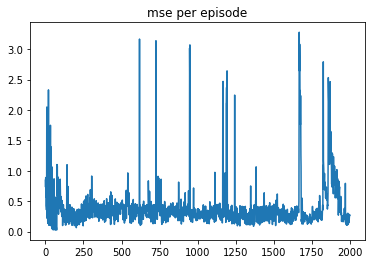

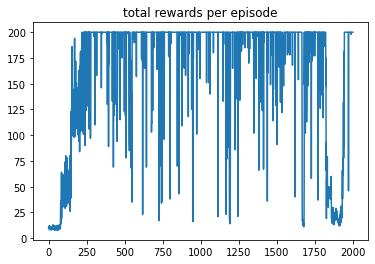

In [4]:
model = Approx_control()
model.build_phi(env)
model.train(env)

In [5]:
model.play_game(env,episodes=5)

episode:  1  reward:  200.0
episode:  2  reward:  200.0
episode:  3  reward:  200.0
episode:  4  reward:  200.0
episode:  5  reward:  200.0
Average test reward:  200.0


<h1>Math</h1>

In this section, we'll be assigned some exercises to practice what we've learned in this notebook

---

<h3>Excercises for Function Approximation</h3>

Clearly, the concept of function approximation is very general

There are tons of combinations we could have tried

So in this section, we're going to enumerate some of these things and hopefully by doing these exercises, we will reinforce what we've learned in this course

OK, so the first thing we can try is other feature expansions

Try polynomials of different degrees, have a look at scikit-learn and see what other feature expansions are available

Number two, we discussed that there are many ways to form the target value

For example, Monte Carlo and SARSA 

Implement these :)

Number three, in this course, we used to cast gradient descent, updating the weights for each separate target value

But how about batch gradient descent? 

For example, with Monte Carlo this is natural because we effectively have all the returns at the same time after the episode is complete

Number four, if we know how to implement a neural network with Tensorflow or PyTorch or Keras or any other deep learning library, try using that instead of a static feature expansion

In this case, our gradient descent update looks more generic 

Rather than using the gradient of a linear model, which is just the input feature $x$, we have the gradient of the model output with respect to the model parameters, which differs depending on which model we chose

$$\large \theta \leftarrow \theta - \alpha \frac{\partial \left(G-\hat Q(s,a)\right)^2}{\partial \theta}$$

Now, of course, we don't have to worry about what form this gradient takes since modern deep learning libraries take care of that for us

We also have access to other more advanced optimization techniques such as momentum, Adam and rms-prop

---

<h3>Different Ways to Encode Action</h3>

Number five, recall that in this notebook, we formed the feature expansion of the state action pair by one hot encoding the action and then concatenating that with the state 

$$\large \varphi(s,a) = \text{ concat(state,one-hot encoded action)}$$

In practice, we actually have several options

Another option is this

Suppose that we have $N$ continuous variables and $K$ possible discrete actions 

Then to represent our state action pair as a vector, we could create a big vector of size $N \times K$ (thats a long vector not a matrix)

If action one is chosen, then the first and elements would hold the state measurements and the rest would be zero

If action number two is chosen, then the next $N$ elements would hold the state measurements and the rest would be zero

$$\large{x = f(s) \in \Large{\mathfrak{R}}^N} \text{(some feature expansion of s)} \\ \large \varphi(s,a_1) = (x_1,\ldots,x_N,0,0,\ldots \ldots \ldots \ldots,0) \\ \large \varphi(s,a_2) = (0,\ldots,0,x_1,\ldots,x_N,0,0,\ldots,0) \\ \large{...} \\ \large{\varphi(s,a_K) = (0,0,\ldots \ldots \ldots \ldots,0,x_1,\ldots,x_N)}$$

OK, so hopefully we get the idea the state gets put into different positions based on which action was chosen

So that's how we're able to differentiate between different actions

---

Yet another option is this, instead of trying to combine the state inaction action into a single vector, just transform the state by itself, as we did for prediction 

For the actions, simply create multiple outputs

For example, if we have $K$ actions, then our model becomes 

$$\large \hat y = W^T \varphi(s), \text{where } \hat y \in \Large{\mathfrak{R}}^K, W \in \Large{\mathfrak{R}}^{N \times K}, \varphi(s) \in \mathfrak{R}^N$$

In this case, $\hat y$ is no longer a scalar, but rather a vector of size $K$

<img src='extras/58.17.PNG' width='500'>

The wait is now a matrix instead of just a vector of size and by K

So in this case each output prediction $\hat y$ represents $Q(s,a)$ for each possible action $a$

---

As part of this exercise, consider the pros and cons of each approach, which ones have more parameters and which ones have less, and if we're familiar with neural networks, consider this question both for linear models and neural networks

Which ones require more computation?

Which ones can handle continuous actions?

And if we do have continuous actions, what challenges would do we have to overcome?

note : all seem pretty basic, so we are skipping

<h1>Math</h1>

In this section, we will summarize everything we learned in this notebook

---

<h3>Function Approximation notebook Summary</h3>

This notebook was all about function approximation for reinforcement learning

The motivation behind the notebook is clear 

For modern problems like playing chess, go, video games and autonomous vehicles, the state spaces are too large or infinite in size

In these cases, tabular methods are limited

Now it's possible to take a continuous or infinite state space and simply discretise it into buckets

But even that will fail at some point

In practice, function approximation offers a reliable solution

It essentially allows us to compress the value function parameter space 

Instead of having to enumerate all possible states, we only need to find a small number of parameters

This can help us predict the value even for states we have never seen before, as long as they are sufficiently similar to states that we have seen before

---

In this notebook, we first reviewed linear models and how they learn via stochastic gradient descent

We then learn that linear models are actually not limited to modeling linear functions since we can
use feature engineering

We considered polynomial feature expansions in the RBF Kernel

Next, we returned to reinforcement learning and applied function approximation to prediction

This allowed us to find the value function of a given policy using a linear model

Next, we turned our attention to control and looked at Q-learning with function approximation

Finally, we looked at a new environment called CartPole

Since this environment has a continuous state space, it allowed us to see the real power of approximation methods 

Gridworld is still a critical part of this series, because it allows us to compare and contrast each method we learned while keeping the
environment constant

---

<h3>"All data is the same"</h3>

But CartPole allowed us to extend what we've learned with essentially zero effort

It lets us see what we're really capable of, despite the fact that GridWorld might seem overly simplistic

This is encapsulated in the rule, $\text{All data is the same}$

Using the exact same code, we were able to solve a much more complex environment with essentially zero effort

This is because, like all other machine learning algorithms, the same code works no matter the data

When we consider things from the perspective of the computer, we know that the computer doesn't know anything about CartPole or Newtonian physics or video games

All the computer can see is numbers

So for us, while it may seem like there's a big difference between dataset one and dataset two or environment one and environment two, the computer says, well, to me it all just looks like numbers